In [124]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [125]:
df=pd.read_csv("credit_card.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [126]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [127]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(0)

In [128]:
df = df.dropna(axis=0, subset=['CREDIT_LIMIT'])

In [129]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [130]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,834.075035,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2336.104378,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,163.029483,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,289.686899,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [131]:
df.drop('CUST_ID',axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
sns.pairplot(data=df,hue="BALANCE")

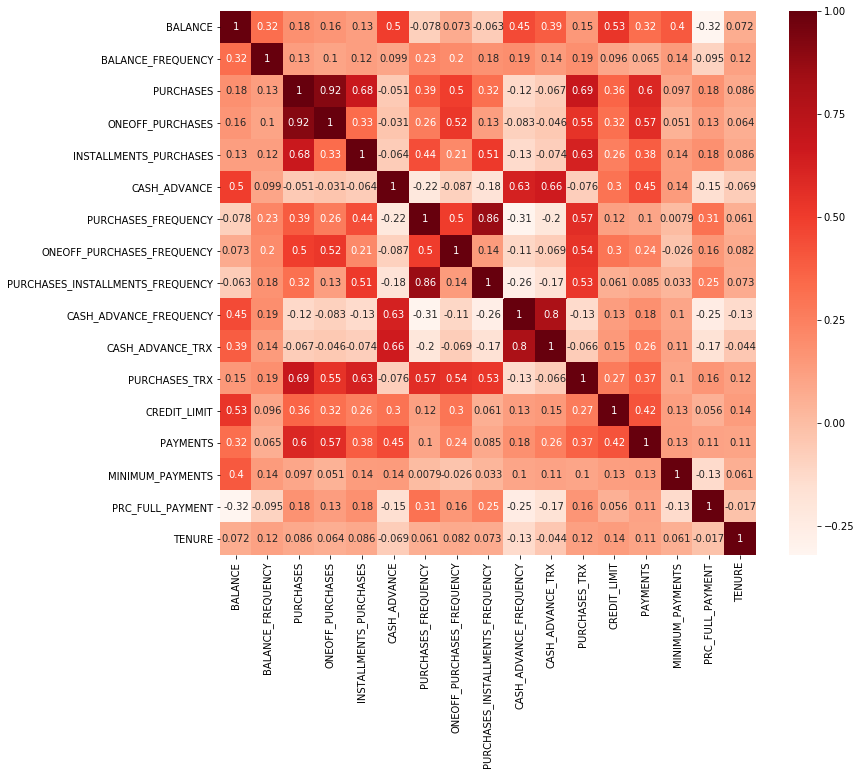

In [80]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [132]:
#Correlation with output variable
cor_target = abs(cor["BALANCE"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

BALANCE                   1.000000
BALANCE_FREQUENCY         0.322335
CASH_ADVANCE              0.496679
CASH_ADVANCE_FREQUENCY    0.449246
CASH_ADVANCE_TRX          0.385139
CREDIT_LIMIT              0.531283
PAYMENTS                  0.322769
MINIMUM_PAYMENTS          0.399628
PRC_FULL_PAYMENT          0.319018
Name: BALANCE, dtype: float64

In [133]:
correlations = df.corr()['BALANCE'].sort_values()
correlations

PRC_FULL_PAYMENT                   -0.319018
PURCHASES_FREQUENCY                -0.078054
PURCHASES_INSTALLMENTS_FREQUENCY   -0.063267
TENURE                              0.072421
ONEOFF_PURCHASES_FREQUENCY          0.073114
INSTALLMENTS_PURCHASES              0.126437
PURCHASES_TRX                       0.154297
ONEOFF_PURCHASES                    0.164326
PURCHASES                           0.181230
BALANCE_FREQUENCY                   0.322335
PAYMENTS                            0.322769
CASH_ADVANCE_TRX                    0.385139
MINIMUM_PAYMENTS                    0.399628
CASH_ADVANCE_FREQUENCY              0.449246
CASH_ADVANCE                        0.496679
CREDIT_LIMIT                        0.531283
BALANCE                             1.000000
Name: BALANCE, dtype: float64

BALANCE : Balance amount left in their account to make purchases 
CREDITLIMIT : Limit of Credit Card for user
CASHADVANCE : Cash in advance given by the user
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

In [134]:
from sklearn.preprocessing import StandardScaler

col_names = ['BALANCE','CREDIT_LIMIT', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY']
features = df[col_names]
scaler = StandardScaler()
features = scaler.fit_transform(features)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,BALANCE,CREDIT_LIMIT,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY
0,-0.732054,-0.960380,-0.466805,-0.675294
1,0.786858,0.688601,2.605438,0.573949
2,0.447041,0.826016,-0.466805,-0.675294
3,0.049015,0.826016,-0.368678,-0.258882
4,-0.358849,-0.905414,-0.466805,-0.675294


In [135]:
X=scaled_features[['BALANCE','CREDIT_LIMIT', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY']]

In [ ]:
sns.pairplot(data=X,hue="BALANCE")

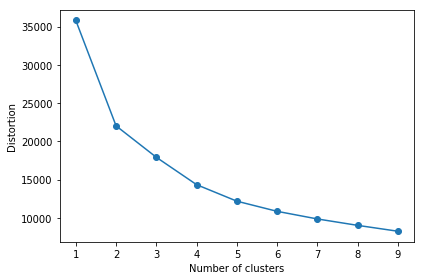

In [87]:
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
identified_clusters = kmeans.fit_predict(X)

In [ ]:
kmeans.cluster_centers_

In [141]:
df['cluster'] = kmeans.labels_
X['cluster'] = kmeans.labels_
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


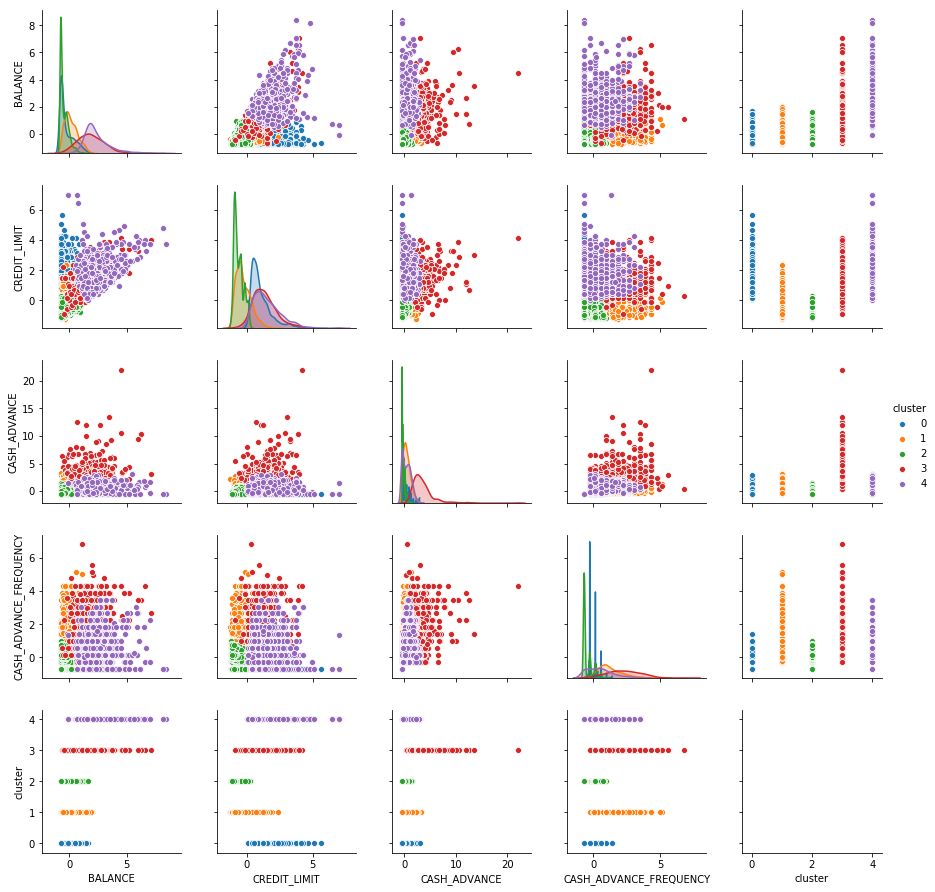

In [142]:
#Scaled data
sns.pairplot(data=X, hue='cluster')

In [143]:
#Appending the identified clusters to the original data

clustered_data = df[['BALANCE','CREDIT_LIMIT', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY','MINIMUM_PAYMENTS']].copy()
clustered_data['cluster'] = identified_clusters
#Viewing the data with clusters
display(clustered_data.sort_values(by='cluster'))
clustered_data

,BALANCE,CREDIT_LIMIT,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,MINIMUM_PAYMENTS,cluster
2757,343.003474,10500.000000,0.000000,0.000000,211.715095,0
2668,57.257195,7227.272727,0.000000,0.000000,174.283792,0
2670,1564.396400,8000.000000,1906.435220,0.083333,825.485459,0
2671,4644.779013,9200.000000,0.000000,0.000000,1324.445876,0
2674,1127.139413,6100.000000,737.622804,0.166667,311.343748,0
2675,41.217844,13500.000000,0.000000,0.000000,167.536373,0
7342,299.531528,7500.000000,0.000000,0.000000,184.243337,0
2686,432.793131,6500.000000,0.000000,0.000000,163.947590,0
2687,127.808682,6500.000000,0.000000,0.000000,160.547945,0
2688,374.276019,6000.000000,0.000000,0.000000,173.108861,0


,BALANCE,CREDIT_LIMIT,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,MINIMUM_PAYMENTS,cluster
0,40.900749,1000.0,0.000000,0.000000,139.509787,2
1,3202.467416,7000.0,6442.945483,0.250000,1072.340217,3
2,2495.148862,7500.0,0.000000,0.000000,627.284787,0
3,1666.670542,7500.0,205.788017,0.083333,0.000000,0
4,817.714335,1200.0,0.000000,0.000000,244.791237,2
5,1809.828751,1800.0,0.000000,0.000000,2407.246035,2
6,627.260806,13500.0,0.000000,0.000000,198.065894,0
7,1823.652743,2300.0,0.000000,0.000000,532.033990,2
8,1014.926473,7000.0,0.000000,0.000000,311.963409,0
9,152.225975,11000.0,0.000000,0.000000,100.302262,0


In [146]:
X.head()

,BALANCE,CREDIT_LIMIT,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,cluster
0,-0.732054,-0.960380,-0.466805,-0.675294,2
1,0.786858,0.688601,2.605438,0.573949,3
2,0.447041,0.826016,-0.466805,-0.675294,0
3,0.049015,0.826016,-0.368678,-0.258882,0
4,-0.358849,-0.905414,-0.466805,-0.675294,2


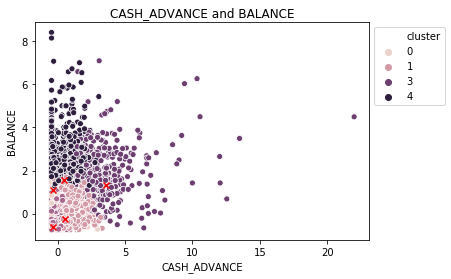

In [145]:
# Compare with scaled data or real data?
# compare "CASH_ADVANCE" and "BALANCE"
sns.scatterplot(data=X, x='CASH_ADVANCE', y='BALANCE', hue='cluster')

# scatterplot of centroid coordinates for CASH_ADVANCE and BALANCE
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 1], c='red', marker='x')

plt.title("CASH_ADVANCE and BALANCE")
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [147]:
cluster = clustered_data.loc[clustered_data['cluster'] == 0]
cluster.head()

,BALANCE,CREDIT_LIMIT,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,MINIMUM_PAYMENTS,cluster
2,2495.148862,7500.0,0.000000,0.000000,627.284787,0
3,1666.670542,7500.0,205.788017,0.083333,0.000000,0
6,627.260806,13500.0,0.000000,0.000000,198.065894,0
8,1014.926473,7000.0,0.000000,0.000000,311.963409,0
9,152.225975,11000.0,0.000000,0.000000,100.302262,0


In [148]:
cluster.describe()

,BALANCE,CREDIT_LIMIT,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,MINIMUM_PAYMENTS,cluster
count,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.0
mean,1069.476814,8482.075366,196.340922,0.025429,478.521569,0.0
std,1235.697035,2930.841830,635.618029,0.058138,1982.273458,0.0
min,0.000000,4900.000000,0.000000,0.000000,0.000000,0.0
25%,102.187166,6500.000000,0.000000,0.000000,162.199251,0.0
50%,459.801577,7500.000000,0.000000,0.000000,204.952496,0.0
75%,1852.327866,9500.000000,0.000000,0.000000,513.706308,0.0
max,4995.229116,25000.000000,7155.612737,0.416667,56370.041170,0.0


BALANCE : Balance amount left in their account to make purchases 
CREDITLIMIT : Limit of Credit Card for user
CASHADVANCE : Cash in advance given by the user
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

In [149]:
# sort the cluster numbers from min(0) to max(4)
sorted_clusters = sorted(clustered_data['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average BALANCE
print("Cluster Balance Ranges\n")
for cluster_num in sorted_clusters:
    small_df = df.loc[df['cluster'] == cluster_num]
    min_cash_advance = small_df['CASH_ADVANCE'].min()
    max_cash_advance = small_df['CASH_ADVANCE'].max()
    avg_balance = small_df['BALANCE'].mean()
    
    print(f"Cluster {cluster_num}: ${min_cash_advance}-{max_cash_advance}, avg balance: {int(avg_balance)}")

Cluster Balance Ranges

Cluster 0: $0.0-7155.612737, avg balance: 1069
Cluster 1: $59.673576000000004-7894.578815999999, avg balance: 1957
Cluster 2: $0.0-3947.583198, avg balance: 667
Cluster 3: $1651.286918-47137.211760000006, avg balance: 5581
Cluster 4: $0.0-7362.379262, avg balance: 6585


In [122]:
# sort the cluster numbers from min(0) to max(4)
sorted_clusters = sorted(clustered_data['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average BALANCE
print("Cluster Balance Ranges\n")
for cluster_num in sorted_clusters:
    small_df = df.loc[df['cluster'] == cluster_num]
    min_credit_limit = small_df['CREDIT_LIMIT'].min()
    max_credit_limit = small_df['CREDIT_LIMIT'].max()
    avg_balance = small_df['BALANCE'].mean()
    
    print(f"Cluster {cluster_num}: ${min_credit_limit}-{max_credit_limit}, avg balance: {int(avg_balance)}")

Cluster Balance Ranges

Cluster 0: $50.0-13000.0, avg balance: 1955
Cluster 1: $150.0-5500.0, avg balance: 667
Cluster 2: $4500.0-30000.0, avg balance: 6590
Cluster 3: $1200.0-19600.0, avg balance: 5570
Cluster 4: $4900.0-25000.0, avg balance: 1069
